In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
from sklearn.cluster import KMeans

In [ ]:
naga=pd.read_csv("/content/Quote-Equity-NAGAFERT-EQ-08-04-2023-to-08-04-2024.csv")
naga.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,05-Apr-2024,EQ,10.95,11.25,10.85,10.75,11.25,11.25,11.10,15.85,7.9,"7,96,497","88,45,063.45","2,036"
1,04-Apr-2024,EQ,10.75,10.75,10.20,10.25,10.75,10.75,10.61,15.85,7.9,"25,40,828","2,69,67,091.25","3,355"
2,03-Apr-2024,EQ,10.20,10.25,10.10,9.80,10.25,10.25,10.23,15.85,7.9,"3,24,473","33,17,859.25",441
3,02-Apr-2024,EQ,9.65,9.80,9.55,9.35,9.80,9.80,9.75,15.85,7.9,"4,05,781","39,55,474.85",518
4,01-Apr-2024,EQ,9.00,9.35,9.00,8.95,9.35,9.35,9.23,15.85,7.9,"4,61,992","42,63,612.30",657


In [ ]:
naga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           248 non-null    object 
 1   series         248 non-null    object 
 2   OPEN           248 non-null    float64
 3   HIGH           248 non-null    float64
 4   LOW            248 non-null    float64
 5   PREV. CLOSE    248 non-null    float64
 6   ltp            248 non-null    float64
 7   close          248 non-null    float64
 8   vwap           248 non-null    float64
 9   52W H          248 non-null    float64
 10  52W L          248 non-null    float64
 11  VOLUME         248 non-null    object 
 12  VALUE          248 non-null    object 
 13  No of trades   248 non-null    object 
dtypes: float64(9), object(5)
memory usage: 27.2+ KB


In [ ]:
naga.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [ ]:
naga.set_index("Date ",inplace=True)
naga

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
05-Apr-2024,EQ,10.95,11.25,10.85,10.75,11.25,11.25,11.10,15.85,7.90,"7,96,497","88,45,063.45","2,036"
04-Apr-2024,EQ,10.75,10.75,10.20,10.25,10.75,10.75,10.61,15.85,7.90,"25,40,828","2,69,67,091.25","3,355"
03-Apr-2024,EQ,10.20,10.25,10.10,9.80,10.25,10.25,10.23,15.85,7.90,"3,24,473","33,17,859.25",441
02-Apr-2024,EQ,9.65,9.80,9.55,9.35,9.80,9.80,9.75,15.85,7.90,"4,05,781","39,55,474.85",518
01-Apr-2024,EQ,9.00,9.35,9.00,8.95,9.35,9.35,9.23,15.85,7.90,"4,61,992","42,63,612.30",657
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17-Apr-2023,EQ,12.35,12.35,11.90,11.80,12.35,12.35,12.34,19.55,7.95,"18,46,423","2,27,93,300.70",684
13-Apr-2023,EQ,11.20,11.80,10.95,11.25,11.80,11.80,11.37,19.55,7.95,"12,73,464","1,44,80,814.70","1,822"
12-Apr-2023,EQ,12.20,12.20,11.10,11.65,11.20,11.25,11.92,19.55,7.95,"80,38,084","9,57,78,221.00","5,997"


In [ ]:
naga["OPEN "].max()

15.5

In [ ]:
naga.drop(["series "],axis=1,inplace=True)

In [ ]:
for j in naga.columns[-3:]:
    naga[j] = naga[j].apply(lambda i : float(i.replace(",","")))

In [ ]:
naga

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,
05-Apr-2024,10.95,11.25,10.85,10.75,11.25,11.25,11.10,15.85,7.90,796497.0,8845063.45,2036.0
04-Apr-2024,10.75,10.75,10.20,10.25,10.75,10.75,10.61,15.85,7.90,2540828.0,26967091.25,3355.0
03-Apr-2024,10.20,10.25,10.10,9.80,10.25,10.25,10.23,15.85,7.90,324473.0,3317859.25,441.0
02-Apr-2024,9.65,9.80,9.55,9.35,9.80,9.80,9.75,15.85,7.90,405781.0,3955474.85,518.0
01-Apr-2024,9.00,9.35,9.00,8.95,9.35,9.35,9.23,15.85,7.90,461992.0,4263612.30,657.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17-Apr-2023,12.35,12.35,11.90,11.80,12.35,12.35,12.34,19.55,7.95,1846423.0,22793300.70,684.0
13-Apr-2023,11.20,11.80,10.95,11.25,11.80,11.80,11.37,19.55,7.95,1273464.0,14480814.70,1822.0
12-Apr-2023,12.20,12.20,11.10,11.65,11.20,11.25,11.92,19.55,7.95,8038084.0,95778221.00,5997.0


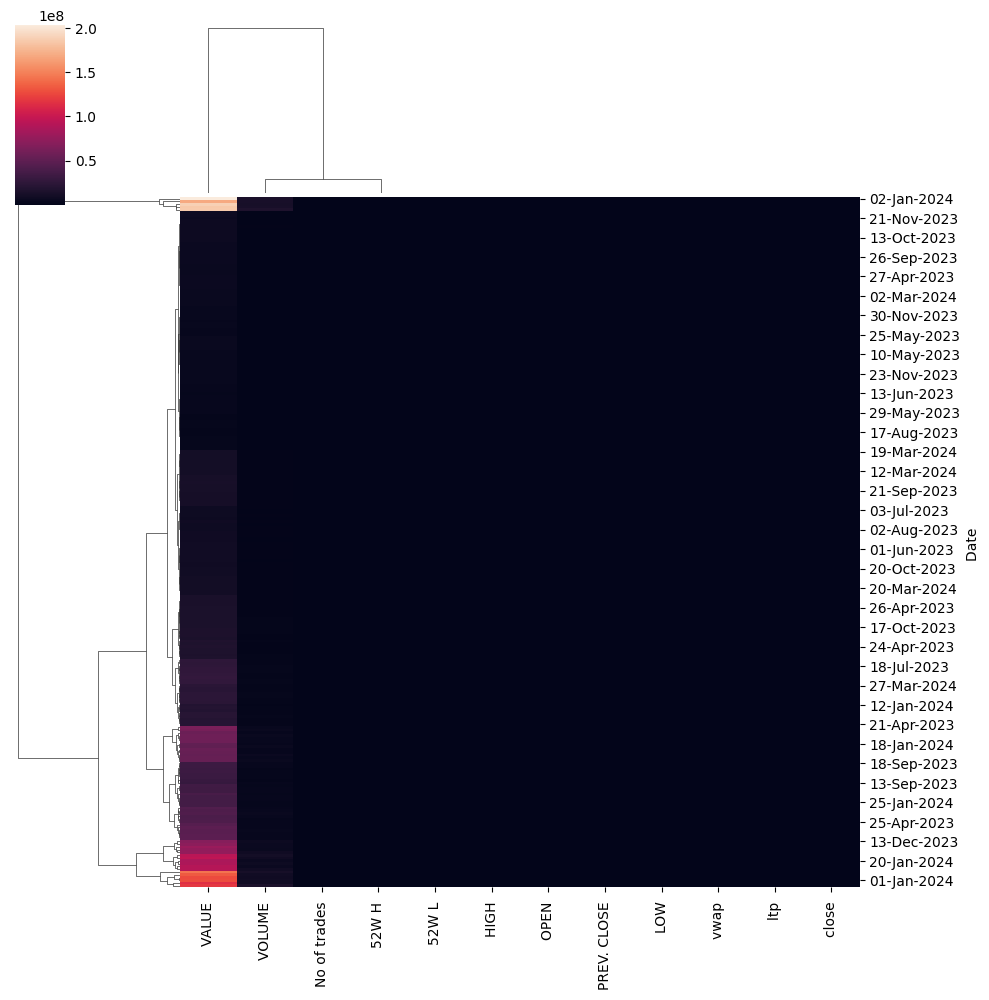

In [ ]:
sns.clustermap(naga)
plt.show()

In [ ]:
naga_wcss=[]
for i in range(1,100):
  model=KMeans(i)
  model.fit(naga)
  naga_wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

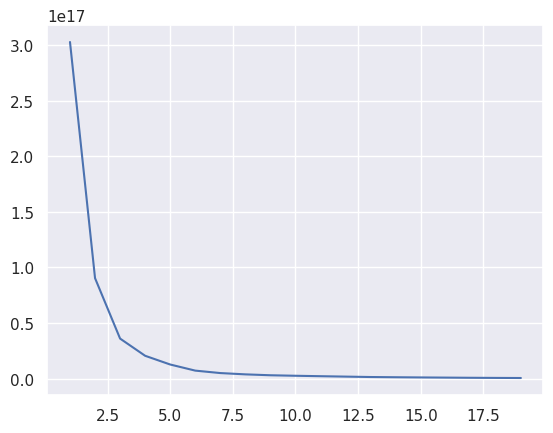

In [ ]:
sns.set()
plt.plot(range(1,20),naga_wcss[0:19])
plt.show()

In [ ]:
model=KMeans(10)
model.fit(naga)
identify_cluster=model.fit_predict(naga)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
naga["cluster"]=identify_cluster

In [ ]:
naga

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
05-Apr-2024,10.95,11.25,10.85,10.75,11.25,11.25,11.10,15.85,7.90,796497.0,8845063.45,2036.0,8
04-Apr-2024,10.75,10.75,10.20,10.25,10.75,10.75,10.61,15.85,7.90,2540828.0,26967091.25,3355.0,5
03-Apr-2024,10.20,10.25,10.10,9.80,10.25,10.25,10.23,15.85,7.90,324473.0,3317859.25,441.0,0
02-Apr-2024,9.65,9.80,9.55,9.35,9.80,9.80,9.75,15.85,7.90,405781.0,3955474.85,518.0,0
01-Apr-2024,9.00,9.35,9.00,8.95,9.35,9.35,9.23,15.85,7.90,461992.0,4263612.30,657.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17-Apr-2023,12.35,12.35,11.90,11.80,12.35,12.35,12.34,19.55,7.95,1846423.0,22793300.70,684.0,5
13-Apr-2023,11.20,11.80,10.95,11.25,11.80,11.80,11.37,19.55,7.95,1273464.0,14480814.70,1822.0,8
12-Apr-2023,12.20,12.20,11.10,11.65,11.20,11.25,11.92,19.55,7.95,8038084.0,95778221.00,5997.0,9


In [ ]:
naga['cluster'].value_counts()

cluster
0    103
8     58
5     24
6     16
3     14
7     11
4      6
9      6
1      5
2      5
Name: count, dtype: int64

In [ ]:
naga[naga.cluster==1]

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
05-Jan-2024,14.20,14.20,13.45,14.00,13.70,13.75,13.83,15.55,7.90,5383965.0,74458791.30,5931.0,1
28-Dec-2023,12.65,12.85,11.85,12.50,12.65,12.55,12.38,13.55,7.90,6325070.0,78307013.85,5973.0,1
13-Dec-2023,10.60,10.60,9.95,10.35,10.50,10.50,10.41,13.55,7.90,6605110.0,68765172.05,4505.0,1
29-Aug-2023,9.20,9.20,8.40,8.80,8.40,8.45,8.89,13.55,7.90,8437396.0,74994715.30,4880.0,1
11-Aug-2023,10.65,11.55,10.50,10.50,11.55,11.55,11.37,13.55,7.95,6298810.0,71622677.85,4304.0,1


In [ ]:
naga[naga.cluster==2]

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
04-Jan-2024,14.90,15.15,13.95,14.65,13.95,14.00,14.27,15.55,7.9,12920501.0,1.843306e+08,10381.0,2
03-Jan-2024,15.45,15.55,14.45,14.85,14.80,14.65,15.11,15.55,7.9,12454328.0,1.882409e+08,12192.0,2
02-Jan-2024,14.25,14.85,14.05,14.15,14.85,14.85,14.72,14.85,7.9,13807659.0,2.032163e+08,8516.0,2
27-Dec-2023,12.95,13.30,12.25,12.25,12.40,12.50,12.85,13.55,7.9,13140111.0,1.688019e+08,10952.0,2
20-Dec-2023,10.70,11.60,10.45,10.55,10.70,10.60,11.21,13.55,7.9,16532297.0,1.853520e+08,9201.0,2


In [ ]:
naga[naga.cluster==6]

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
14-Mar-2024,9.55,10.10,9.45,9.95,9.80,9.80,9.65,15.85,7.90,3530594.0,34086082.95,4137.0,6
13-Feb-2024,13.10,13.20,12.55,13.20,12.90,12.90,12.77,15.85,7.90,2493932.0,31859527.30,3027.0,6
06-Feb-2024,14.10,14.45,13.80,14.00,14.20,14.20,14.16,15.85,7.90,2697693.0,38199952.55,3561.0,6
25-Jan-2024,14.35,14.75,14.30,14.30,14.50,14.45,14.53,15.55,7.90,2485139.0,36105128.05,3602.0,6
16-Jan-2024,13.20,13.50,12.90,13.05,13.40,13.40,13.25,15.55,7.90,2344616.0,31061254.40,2982.0,6
15-Jan-2024,13.55,13.60,12.90,13.35,13.10,13.05,13.17,15.55,7.90,2765743.0,36432654.55,4045.0,6
10-Jan-2024,13.85,14.00,13.35,13.85,13.40,13.40,13.61,15.55,7.90,2190334.0,29814504.00,3451.0,6
09-Jan-2024,13.85,14.25,13.75,13.80,13.85,13.85,13.99,15.55,7.90,2477361.0,34665194.30,3806.0,6
19-Dec-2023,10.50,10.80,10.30,10.40,10.50,10.55,10.56,13.55,7.90,3457029.0,36495161.20,2496.0,6


In [ ]:
naga[naga.cluster==9]

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
29-Jan-2024,14.60,15.10,14.55,14.45,14.90,15.00,14.94,15.55,7.90,6062954.0,90602853.60,5529.0,9
20-Jan-2024,14.55,14.75,13.90,14.05,14.75,14.75,14.48,15.55,7.90,5946337.0,86112329.10,5576.0,9
21-Dec-2023,10.60,11.35,10.45,10.60,11.30,11.15,11.06,13.55,7.90,7838522.0,86687109.20,4953.0,9
08-Dec-2023,10.15,10.60,10.00,9.80,10.10,10.05,10.24,13.55,7.90,8867289.0,90792394.05,6382.0,9
22-Aug-2023,8.70,9.05,8.70,9.15,8.70,8.70,8.74,13.55,7.95,10706451.0,93606172.30,2627.0,9
12-Apr-2023,12.20,12.20,11.10,11.65,11.20,11.25,11.92,19.55,7.95,8038084.0,95778221.00,5997.0,9


In [ ]:
naga[naga.cluster==4]

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
31-Jan-2024,15.50,15.85,14.50,15.25,14.65,14.65,14.90,15.85,7.9,8901497.0,1.326673e+08,8289.0,4
30-Jan-2024,15.15,15.70,14.85,15.00,15.30,15.25,15.40,15.70,7.9,8229688.0,1.267467e+08,7746.0,4
01-Jan-2024,13.00,14.15,12.95,12.90,14.15,14.15,13.73,14.15,7.9,9278437.0,1.273999e+08,6964.0,4
29-Dec-2023,12.60,13.50,12.45,12.55,12.90,12.90,13.03,13.55,7.9,8797339.0,1.146077e+08,6602.0,4
26-Dec-2023,11.20,12.30,11.10,11.20,12.30,12.25,12.00,13.55,7.9,12031599.0,1.444046e+08,8196.0,4
24-Aug-2023,7.90,8.35,7.90,8.30,8.00,8.00,8.01,13.55,7.9,14857051.0,1.189683e+08,7832.0,4


In [ ]:
pd.set_option("display.max_rows",None)
naga

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
05-Apr-2024,10.95,11.25,10.85,10.75,11.25,11.25,11.10,15.85,7.90,796497.0,8.845063e+06,2036.0,8
04-Apr-2024,10.75,10.75,10.20,10.25,10.75,10.75,10.61,15.85,7.90,2540828.0,2.696709e+07,3355.0,5
03-Apr-2024,10.20,10.25,10.10,9.80,10.25,10.25,10.23,15.85,7.90,324473.0,3.317859e+06,441.0,0
02-Apr-2024,9.65,9.80,9.55,9.35,9.80,9.80,9.75,15.85,7.90,405781.0,3.955475e+06,518.0,0
01-Apr-2024,9.00,9.35,9.00,8.95,9.35,9.35,9.23,15.85,7.90,461992.0,4.263612e+06,657.0,0
28-Mar-2024,9.35,9.60,8.90,9.25,8.95,8.95,9.21,15.85,7.90,2503325.0,2.304439e+07,3174.0,5
27-Mar-2024,9.70,9.75,9.20,9.65,9.25,9.25,9.42,15.85,7.90,2360985.0,2.223463e+07,2902.0,5
26-Mar-2024,10.05,10.05,9.55,9.90,9.55,9.65,9.74,15.85,7.90,1490517.0,1.452278e+07,2292.0,8
22-Mar-2024,10.30,10.30,9.80,10.20,9.90,9.90,9.96,15.85,7.90,1929776.0,1.922481e+07,2505.0,5
